### Project Description:

From Insta Influencers datset, Answer the given five questions,

    1 Name Max co-efficent of Co-Related features   
    2 Frequency Distributions of Features namely i)Influence Score,ii)Followers iii)Posts  
    3 Count of Instagram influencers in different countries   
    4 Top 10 influencers based on i)Followers,ii)Average likes iii)Total Likes
    5 Relationship between i)Followers and Total Likes ii)Followers and Influence Score iii)Posts and Average likes iv)Posts and Influence Score

### Importing Libraries:

In [27]:
import pandas as pd
df=pd.read_csv("Influencer.csv")

In [28]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


## Pre Processing and EDA:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [30]:
df.describe() # here other columns are in string data, that's why it is not showing

,Rank,Influence Score,60-Day Eng Rate
count,200.000000,200.000000,200.000000
mean,100.500000,81.850000,0.019160
std,57.879185,8.875323,0.032577
min,1.000000,22.000000,0.000000
25%,50.750000,80.000000,0.004000
50%,100.500000,84.000000,0.009500
75%,150.250000,86.000000,0.017250
max,200.000000,93.000000,0.250000


In [31]:
# Removing the null values 
df.dropna(inplace=True)

In [32]:
df
# Here index after dropping never update as new index,Old index is retained. That's why it's showing 199 at the bottom 
# But when you check it shows only 138 rows, So Null values rows are deleted

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
5,6,\narianagrande,92,333.0m,3.7m,5.0k,0.009,3.1m,18.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [33]:
df['Posts']

0      3.4k
1      7.0k
3      1.9k
4      6.8k
5      5.0k
       ... 
195    4.6k
196    1.4k
197    4.2k
198     865
199    3.8k
Name: Posts, Length: 137, dtype: object

In [34]:
# Converting posts variables datatype from str to float and replace 'k' by multiplying 1000
posts=list(df['Posts'])
posts1=[]
for num in posts:
    num=1000*float(num.replace('k',''))
    posts1.append(num)
posts1
    

[3400.0,
 7000.0,
 1900.0,
 6800.0,
 5000.0,
 5700.0,
 2000.0,
 4100.0,
 7400.0,
 671000.0,
 10000.0,
 973000.0,
 542000.0,
 3200.0,
 6400.0,
 4400.0,
 5300.0,
 8300.0,
 3500.0,
 1600.0,
 105000.0,
 4800.0,
 7100.0,
 10000.0,
 5200.0,
 7400.0,
 1700.0,
 1300.0,
 1800.0,
 3600.0,
 3600.0,
 3300.0,
 1600.0,
 3000.0,
 2300.0,
 1900.0,
 12800.0,
 2500.0,
 549000.0,
 285000.0,
 3000.0,
 1200.0,
 379000.0,
 1000.0,
 7200.0,
 785000.0,
 2900.0,
 9800.0,
 2400.0,
 1400.0,
 5100.0,
 8200.0,
 10100.0,
 9800.0,
 2700.0,
 2800.0,
 290000.0,
 2000.0,
 10000.0,
 3300.0,
 899000.0,
 1300.0,
 669000.0,
 3200.0,
 1200.0,
 5600.0,
 2200.0,
 3600.0,
 439000.0,
 10000.0,
 10400.0,
 2400.0,
 2700.0,
 423000.0,
 6400.0,
 1100.0,
 2500.0,
 6500.0,
 9000.0,
 6600.0,
 207000.0,
 2400.0,
 618000.0,
 4200.0,
 5300.0,
 165000.0,
 3200.0,
 10000.0,
 3200.0,
 35000.0,
 16900.0,
 1800.0,
 1500.0,
 1900.0,
 617000.0,
 4900.0,
 10000.0,
 9300.0,
 3000.0,
 3700.0,
 1700.0,
 3100.0,
 1500.0,
 1800.0,
 2100.0,
 10000.0,


In [35]:
type(posts1[0])

float

In [39]:
df['Posts']=posts1

In [41]:
df["Posts"]

0        3400.0
1        7000.0
3        1900.0
4        6800.0
5        5000.0
         ...   
195      4600.0
196      1400.0
197      4200.0
198    865000.0
199      3800.0
Name: Posts, Length: 137, dtype: float64

In [42]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,posts
0,1,\ncristiano,92,485.2m,8.7m,3400.0,0.013,6.3m,29.1b,Spain,3400.0
1,2,kyliejenner,91,370.7m,8.2m,7000.0,0.014,5.0m,57.4b,United States,7000.0
3,4,\nselenagomez,93,348.8m,6.1m,1900.0,0.005,1.7m,11.4b,United States,1900.0
4,5,\ntherock,91,339.4m,1.8m,6800.0,0.003,932.0k,12.6b,United States,6800.0
5,6,\narianagrande,92,333.0m,3.7m,5000.0,0.009,3.1m,18.5b,United States,5000.0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4600.0,0.009,305.7k,3.1b,Russia,4600.0
196,197,\ndanbilzerian,84,33.6m,2.2m,1400.0,0.064,2.1m,3.0b,Canada,1400.0
197,198,\nraisa6690,80,33.6m,227.8k,4200.0,0.003,103.2k,955.9m,Indonesia,4200.0
198,199,\nluansantana,79,33.5m,193.3k,865000.0,0.003,82.6k,167.2m,Brazil,865000.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 137 non-null    int64  
 1   Channel Info         137 non-null    object 
 2   Influence Score      137 non-null    int64  
 3   Followers            137 non-null    object 
 4   Avg. Likes           137 non-null    object 
 5   Posts                137 non-null    float64
 6   60-Day Eng Rate      137 non-null    float64
 7   New Post Avg. Likes  137 non-null    object 
 8   Total Likes          137 non-null    object 
 9   Country Or Region    137 non-null    object 
 10  posts                137 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 12.8+ KB


In [45]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region', 'posts'],
      dtype='object')

In [46]:
new_post_avg_like = list(df['New Post Avg. Likes'])
new_post_avg_like1 = []

for each in new_post_avg_like:
    if isinstance(each, str):
        if 'm' in each:
            each = 1000000 * float(each.replace('m', ''))
        else:
            each = 1000 * float(each.replace('k', ''))
    new_post_avg_like1.append(each)

df['New Post Avg. Likes'] = new_post_avg_like1


In [48]:
followers = list(df['Followers'])
followers1 = []

for each in followers:
    each_str = str(each)  # Convert each to a string
    if 'm' in each_str:   # Check if 'm' is in the string representation of each
        each = 1000000 * float(each_str.replace('m', ''))
    else:
        each = float(each)
    followers1.append(each)

df['Followers'] = followers1


In [50]:
avg_likes = list(df['Avg. Likes'])
avg_likes1 = []

for each in avg_likes:
    each_str = str(each)  # Convert each to a string
    if 'm' in each_str:
        each = 1000000 * float(each_str.replace('m', ''))
    elif 'k' in each_str:
        each = 1000 * float(each_str.replace('k', ''))
    else:
        each = float(each)
    avg_likes1.append(each)

df['Avg. Likes'] = avg_likes1


In [54]:
# Set display options to show numbers in regular numeric format
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Your existing code to process the 'Total Likes' column
total_likes = list(df['Total Likes'])
total_likes1 = []

for each in total_likes:
    each_str = str(each)  # Convert each to a string
    if 'm' in each_str:
        each = 1000000 * float(each_str.replace('m', ''))
    elif 'b' in each_str:
        each = 1000000000 * float(each_str.replace('b', ''))
    else:
        each = float(each)
    total_likes1.append(each)

df['Total Likes'] = total_likes1


In [57]:
df["Channel Info"] = df["Channel Info"].str.replace("\n", "")


In [58]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,posts
0,1,cristiano,92,485200000,8700000,3400,0,6300000,29100000000,Spain,3400
1,2,kyliejenner,91,370700000,8200000,7000,0,5000000,57400000000,United States,7000
3,4,selenagomez,93,348800000,6100000,1900,0,1700000,11400000000,United States,1900
4,5,therock,91,339400000,1800000,6800,0,932000,12600000000,United States,6800
5,6,arianagrande,92,333000000,3700000,5000,0,3100000,18500000000,United States,5000
...,...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000,680600,4600,0,305700,3100000000,Russia,4600
196,197,danbilzerian,84,33600000,2200000,1400,0,2100000,3000000000,Canada,1400
197,198,raisa6690,80,33600000,227800,4200,0,103200,955900000,Indonesia,4200
198,199,luansantana,79,33500000,193300,865000,0,82600,167200000,Brazil,865000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 137 non-null    int64  
 1   Channel Info         137 non-null    object 
 2   Influence Score      137 non-null    int64  
 3   Followers            137 non-null    float64
 4   Avg. Likes           137 non-null    float64
 5   Posts                137 non-null    float64
 6   60-Day Eng Rate      137 non-null    float64
 7   New Post Avg. Likes  137 non-null    float64
 8   Total Likes          137 non-null    float64
 9   Country Or Region    137 non-null    object 
 10  posts                137 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 12.8+ KB


### 1) To find max co- eff:

In [60]:
selected_columns = ['Influence Score', 'Followers', 'Avg. Likes', 'Posts', 
                    '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes']

# Compute the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Find the maximum coefficient
max_coefficient = correlation_matrix.max().max()

# Print the maximum coefficient
print("Max co-efficient of Co-Related features:", max_coefficient)

Max co-efficient of Co-Related features: 1.0


## 2) Frequency Distributions :

(array([ 3.,  1.,  0.,  1.,  1.,  3., 14., 36., 54., 24.]),
 array([41. , 46.2, 51.4, 56.6, 61.8, 67. , 72.2, 77.4, 82.6, 87.8, 93. ]),
 <BarContainer object of 10 artists>)

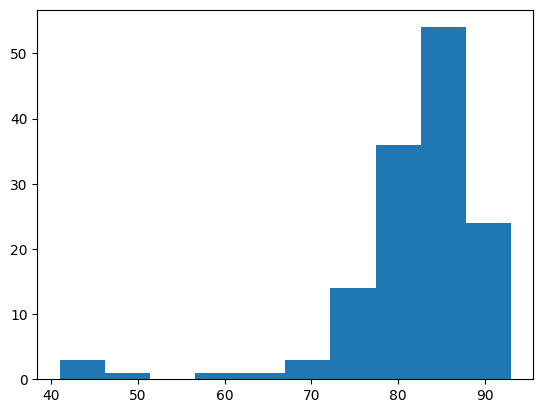

In [62]:
import matplotlib.pyplot as plt
plt.hist(df['Influence Score'])
# x axis-->

(array([111.,   3.,   3.,   2.,   3.,   4.,   4.,   2.,   2.,   3.]),
 array([  1000.,  98200., 195400., 292600., 389800., 487000., 584200.,
        681400., 778600., 875800., 973000.]),
 <BarContainer object of 10 artists>)

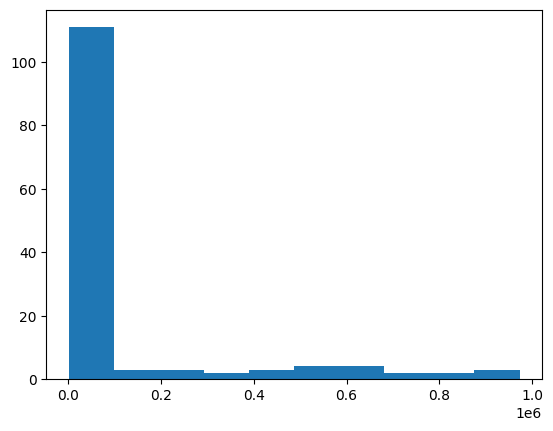

In [67]:
plt.hist(df['Posts'])

(array([106.,   7.,   7.,   3.,   5.,   3.,   4.,   1.,   0.,   1.]),
 array([3.3400e+07, 7.8580e+07, 1.2376e+08, 1.6894e+08, 2.1412e+08,
        2.5930e+08, 3.0448e+08, 3.4966e+08, 3.9484e+08, 4.4002e+08,
        4.8520e+08]),
 <BarContainer object of 10 artists>)

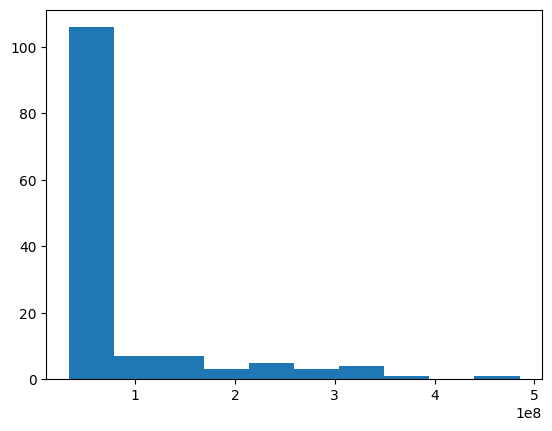

In [68]:
plt.hist(df['Followers'])

# 3) Bar chart countrywise:

In [71]:
# For plotting bar chart, we should have x and y i.e unique countries name and its counts in dictionary
d=dict(df['Country Or Region'].value_counts())
d

{'United States': 65,
 'Brazil': 13,
 'India': 12,
 'Indonesia': 7,
 'France': 6,
 'Spain': 5,
 'United Kingdom': 4,
 'Colombia': 3,
 'Canada': 3,
 'Mexico': 2,
 'Turkey': 2,
 'Netherlands': 2,
 'Switzerland': 1,
 'Germany': 1,
 'Czech Republic': 1,
 'British Virgin Islands': 1,
 'Sweden': 1,
 'Australia': 1,
 'Anguilla': 1,
 "CÃ´te d'Ivoire": 1,
 'Puerto Rico': 1,
 'United Arab Emirates': 1,
 'Italy': 1,
 'Uruguay': 1,
 'Russia': 1}

([<matplotlib.axis.XTick at 0x1fd542ea3f0>,
 [Text(0.0, 0, 'United States'),
  Text(1.0, 0, 'Brazil'),
  Text(2.0, 0, 'India'),
  Text(3.0, 0, 'Indonesia'),
  Text(4.0, 0, 'France'),
  Text(5.0, 0, 'Spain'),
  Text(6.0, 0, 'United Kingdom'),
  Text(7.0, 0, 'Colombia'),
  Text(8.0, 0, 'Canada'),
  Text(9.0, 0, 'Mexico'),
  Text(10.0, 0, 'Turkey'),
  Text(11.0, 0, 'Netherlands'),
  Text(12.0, 0, 'Switzerland'),
  Text(13.0, 0, 'Germany'),
  Text(14.0, 0, 'Czech Republic'),
  Text(15.0, 0, 'British Virgin Islands'),
  Text(16.0, 0, 'Sweden'),
  Text(17.0, 0, 'Australia'),
  Text(18.0, 0, 'Anguilla'),
  Text(19.0, 0, "CÃ´te d'Ivoire"),
  Text(20.0, 0, 'Puerto Rico'),
  Text(21.0, 0, 'United Arab Emirates'),
  Text(22.0, 0, 'Italy'),
  Text(23.0, 0, 'Uruguay'),
  Text(24.0, 0, 'Russia')])

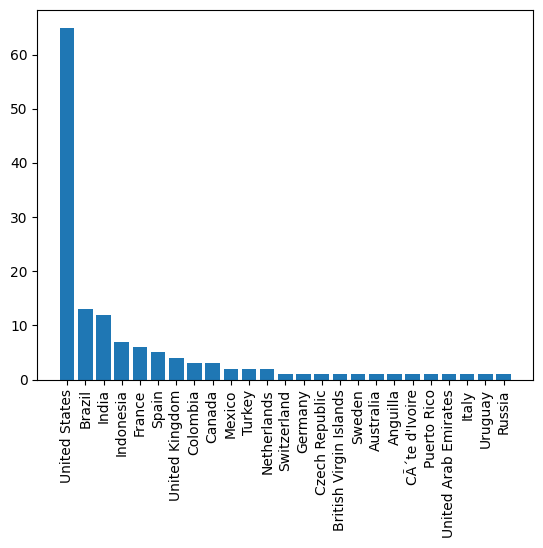

In [72]:
plt.bar((d.keys()),(d.values()))
# Rotation of the bars names
plt.xticks(list(d.keys()), rotation=90)


In [ ]:
# From the graph, United states has maximum insta influencers

### 4) Top 10 influencers based on i)Followers,ii)Average likes iii)Total Likes

In [73]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,posts
0,1,cristiano,92,485200000,8700000,3400,0,6300000,29100000000,Spain,3400
1,2,kyliejenner,91,370700000,8200000,7000,0,5000000,57400000000,United States,7000
3,4,selenagomez,93,348800000,6100000,1900,0,1700000,11400000000,United States,1900
4,5,therock,91,339400000,1800000,6800,0,932000,12600000000,United States,6800
5,6,arianagrande,92,333000000,3700000,5000,0,3100000,18500000000,United States,5000
...,...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000,680600,4600,0,305700,3100000000,Russia,4600
196,197,danbilzerian,84,33600000,2200000,1400,0,2100000,3000000000,Canada,1400
197,198,raisa6690,80,33600000,227800,4200,0,103200,955900000,Indonesia,4200
198,199,luansantana,79,33500000,193300,865000,0,82600,167200000,Brazil,865000


In [ ]:

# Sorting based on 'followrs' column
df.sort_values(by=['Followers'], ascending=False).head(10)

In [75]:

# Sorting Top 10 influencers based on 'Avg_likes' column
df.sort_values(by=['Avg. Likes'], ascending=False).head(10)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,posts
0,1,cristiano,92,485200000,8700000,3400,0,6300000,29100000000,Spain,3400
1,2,kyliejenner,91,370700000,8200000,7000,0,5000000,57400000000,United States,7000
3,4,selenagomez,93,348800000,6100000,1900,0,1700000,11400000000,United States,1900
22,23,zendaya,87,153300000,5900000,3500,0,7500000,20800000000,United States,3500
10,11,kendalljenner,90,258900000,5500000,671000,0,3000000,3700000000,United States,671000
118,119,zayn,82,47300000,4700000,165000,0,3900000,783500000,United States,165000
100,101,adele,84,50900000,4700000,423000,0,1600000,2000000000,United States,423000
115,116,harrystyles,57,47600000,4700000,618000,0,2900000,2900000000,United States,618000
74,75,milliebobbybrown,80,58600000,4100000,290000,0,4800000,1200000000,United States,290000
55,56,bts.bighitofficial,78,68100000,4100000,1200,0,2800000,5000000000,Uruguay,1200


In [76]:
# Sorting Top 10 influencers based on 'Avg_likes' column
df.sort_values(by=['Total Likes'], ascending=False).head(10)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,posts
1,2,kyliejenner,91,370700000,8200000,7000,0,5000000,57400000000,United States,7000
0,1,cristiano,92,485200000,8700000,3400,0,6300000,29100000000,Spain,3400
22,23,zendaya,87,153300000,5900000,3500,0,7500000,20800000000,United States,3500
6,7,kimkardashian,91,330700000,3500000,5700,0,1700000,19800000000,United States,5700
5,6,arianagrande,92,333000000,3700000,5000,0,3100000,18500000000,United States,5000
25,26,badgalriri,88,136300000,3700000,4800,0,6900000,18000000000,United States,4800
19,20,neymarjr,90,179400000,2700000,5300,0,2200000,14400000000,Brazil,5300
9,10,justinbieber,91,260000000,1900000,7400,0,1700000,14000000000,Canada,7400
16,17,nickiminaj,90,202700000,2000000,6400,0,837100,12900000000,United States,6400
4,5,therock,91,339400000,1800000,6800,0,932000,12600000000,United States,6800


### 5)Relationship between i)Followers and Total Likes ii)Followers and Influence Score iii)Posts and Average likes iv)Posts and Influence Score

Text(0, 0.5, 'Total Likes ')

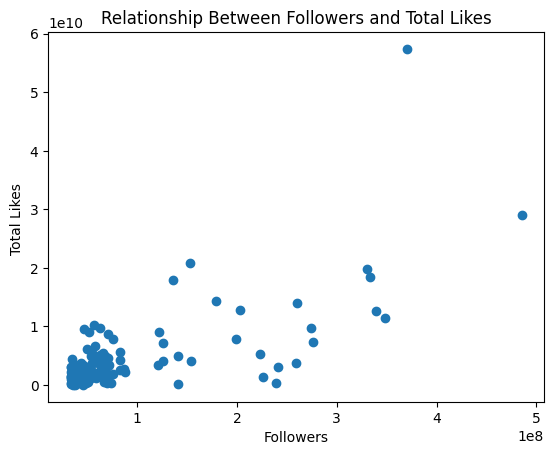

In [77]:
plt.scatter(df['Followers'],df['Total Likes'])
plt.title('Relationship Between Followers and Total Likes')
plt.xlabel("Followers")
plt.ylabel("Total Likes ")

Text(0, 0.5, 'influence_score ')

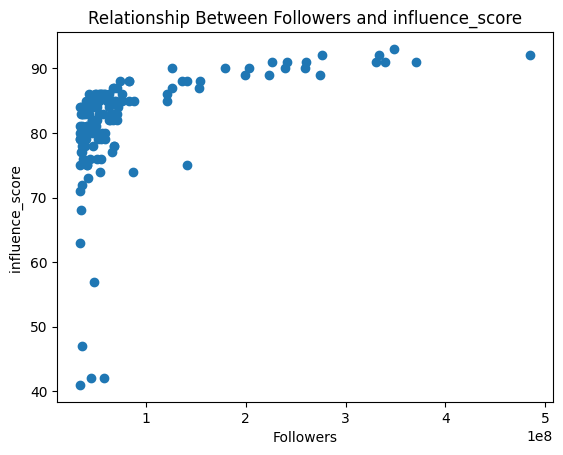

In [79]:
plt.scatter(df['Followers'],df['Influence Score'])
plt.title('Relationship Between Followers and influence_score')
plt.xlabel("Followers")
plt.ylabel("influence_score ")

Text(0, 0.5, 'avg Likes ')

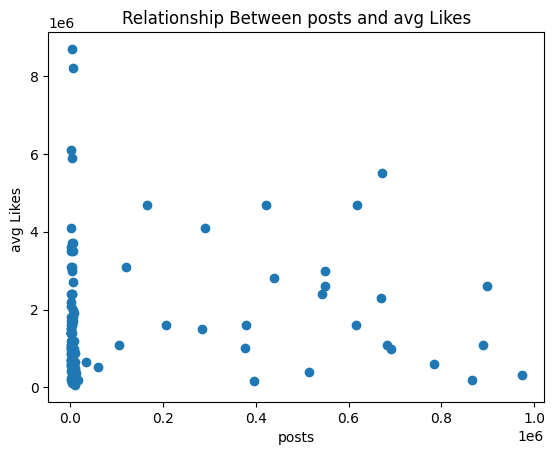

In [80]:
plt.scatter(df['Posts'],df['Avg. Likes'])
plt.title('Relationship Between posts and avg Likes')
plt.xlabel("posts")
plt.ylabel("avg Likes ")

Text(0, 0.5, 'influence_score')

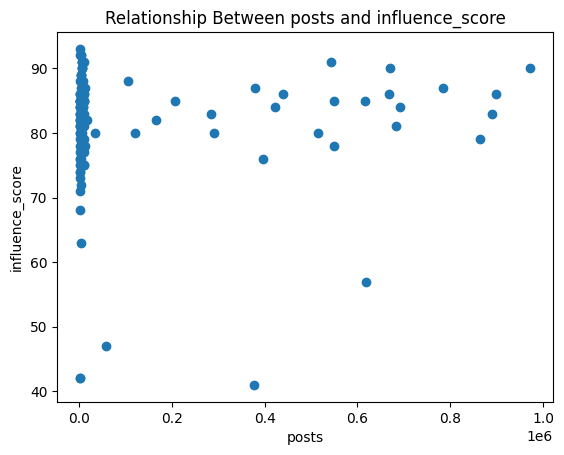

In [78]:
plt.scatter(df['Posts'],df['Influence Score'])
plt.title('Relationship Between posts and influence_score')
plt.xlabel("posts")
plt.ylabel("influence_score")